In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import seaborn as sns

# Exploration Of Asthma Dataset 

In [3]:
# Load teh Dataset
asthma_df = pd.read_csv("data/asthma_disease_data.csv")   
asthma_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


## Basic overview

In [5]:
# Shape and basic info
print("Shape:", asthma_df.shape)
print("\nInfo:")
asthma_df.info()

# Summary statistics
asthma_df.describe(include="all").transpose()

Shape: (2392, 29)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAs

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2392.0,NaN,NaN,NaN,6229.5,690.655244,5034.0,5631.75,6229.5,6827.25,7425.0
Age,2392.0,NaN,NaN,NaN,42.13796,21.606655,5.0,23.0,42.0,61.0,79.0
Gender,2392.0,NaN,NaN,NaN,0.493311,0.50006,0.0,0.0,0.0,1.0,1.0
Ethnicity,2392.0,NaN,NaN,NaN,0.669732,0.98612,0.0,0.0,0.0,1.0,3.0
EducationLevel,2392.0,NaN,NaN,NaN,1.307274,0.898242,0.0,1.0,1.0,2.0,3.0
BMI,2392.0,NaN,NaN,NaN,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,NaN,NaN,NaN,0.141722,0.348838,0.0,0.0,0.0,0.0,1.0
PhysicalActivity,2392.0,NaN,NaN,NaN,5.051786,2.903574,0.00174,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,NaN,NaN,NaN,5.022867,2.90998,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,NaN,NaN,NaN,7.019012,1.732475,4.001437,5.4985,6.975839,8.52695,9.996235


## Missing values

In [7]:
# Count missing values
missing = asthma_df.isna().sum().sort_values(ascending=False)

if missing.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Missing values:\n", missing[missing > 0])
    sns.heatmap(df.isna(), cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()

No missing values in the dataset.


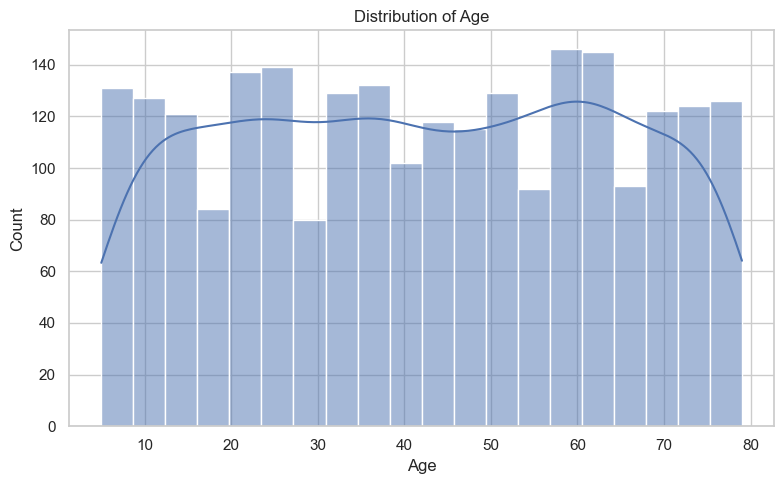

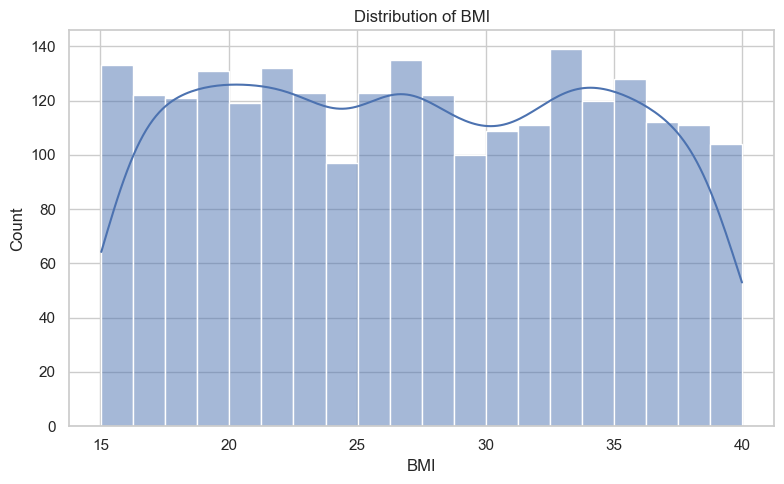

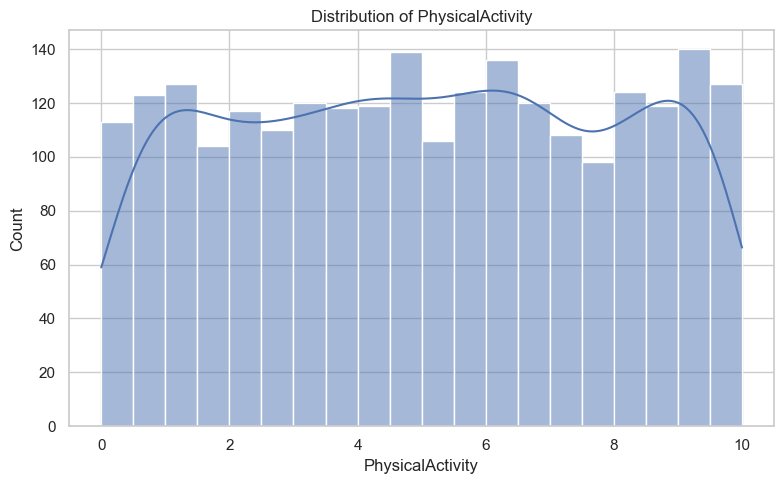

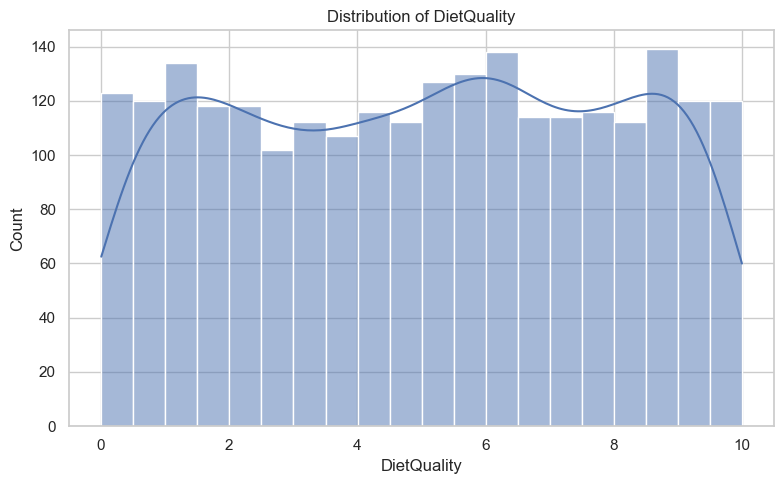

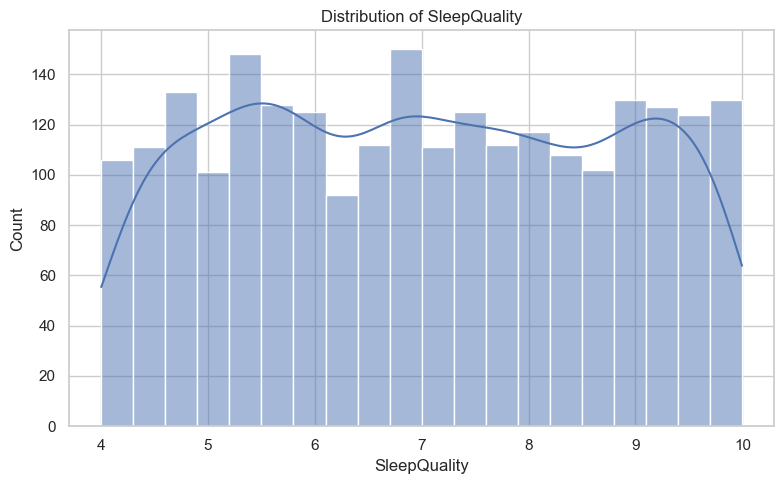

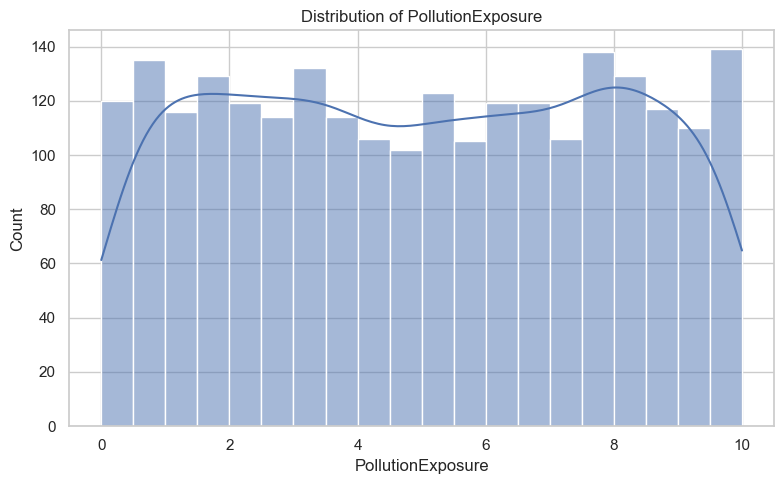

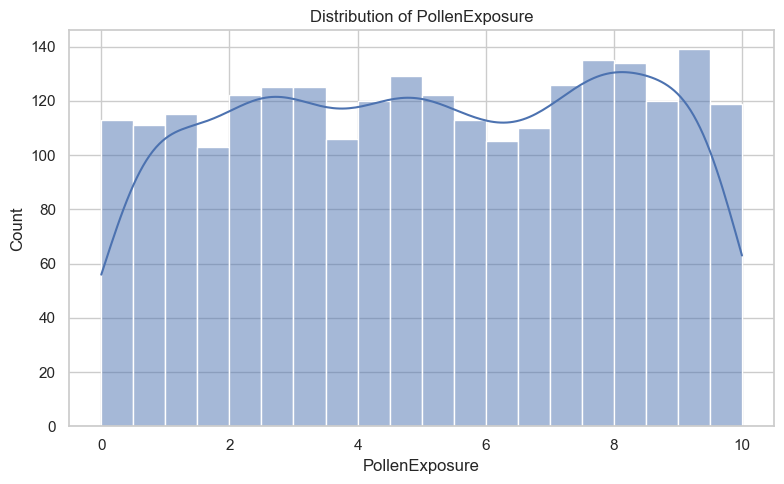

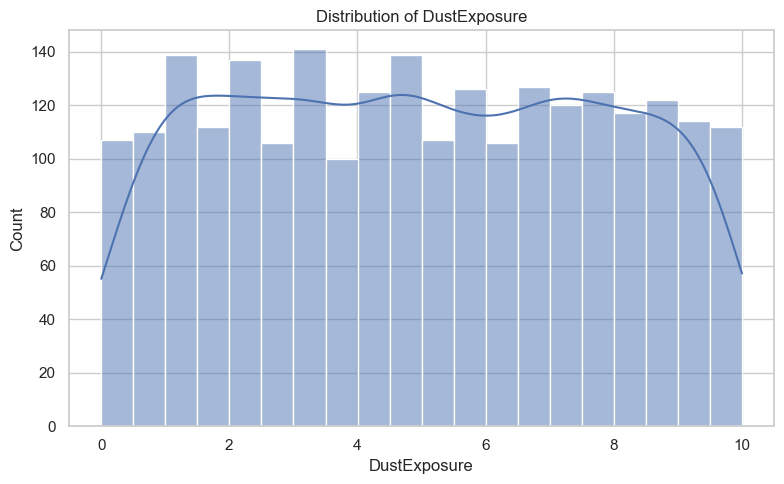

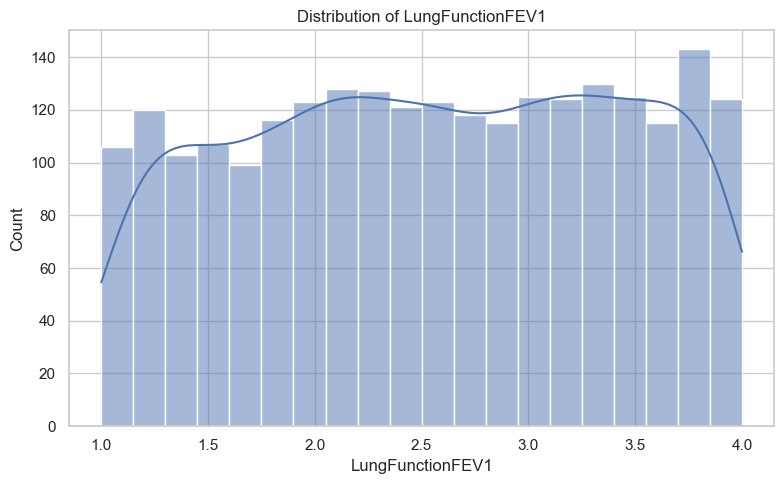

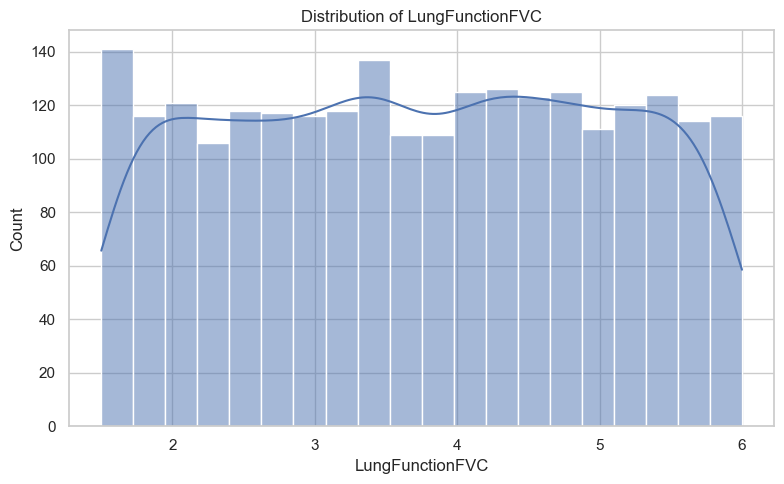

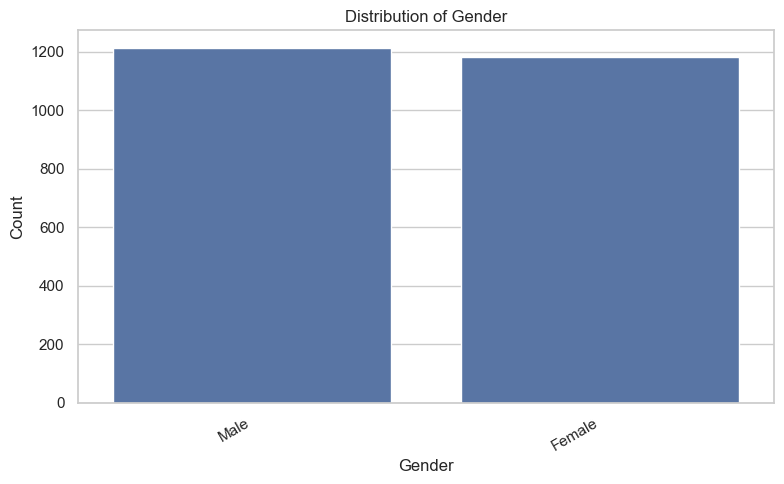

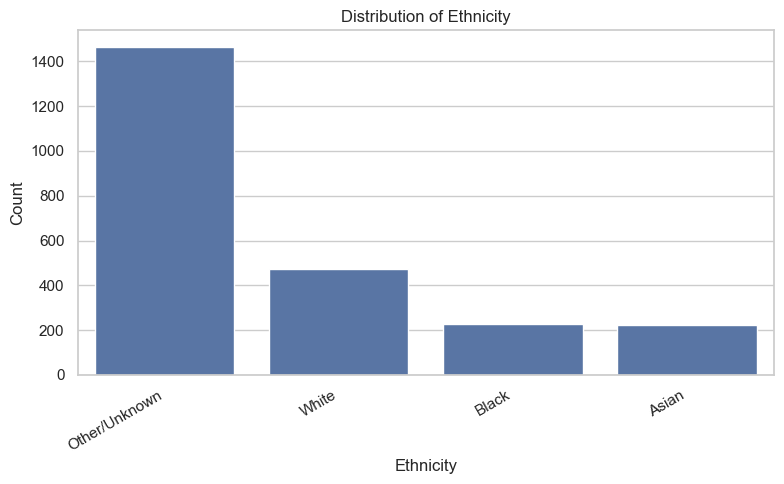

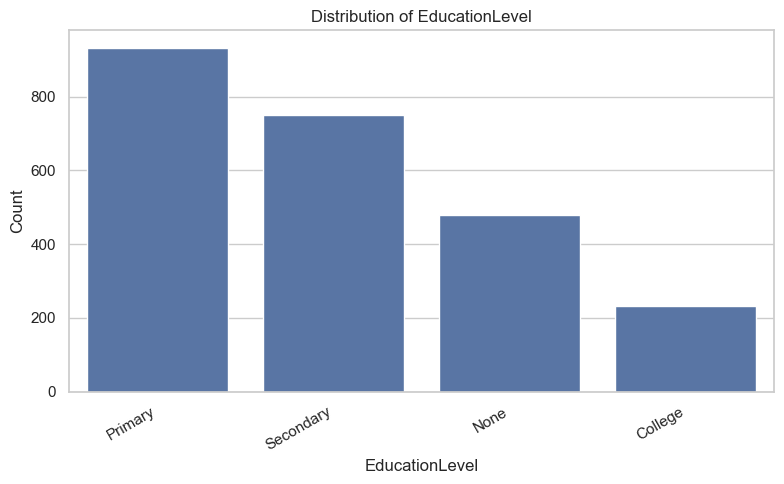

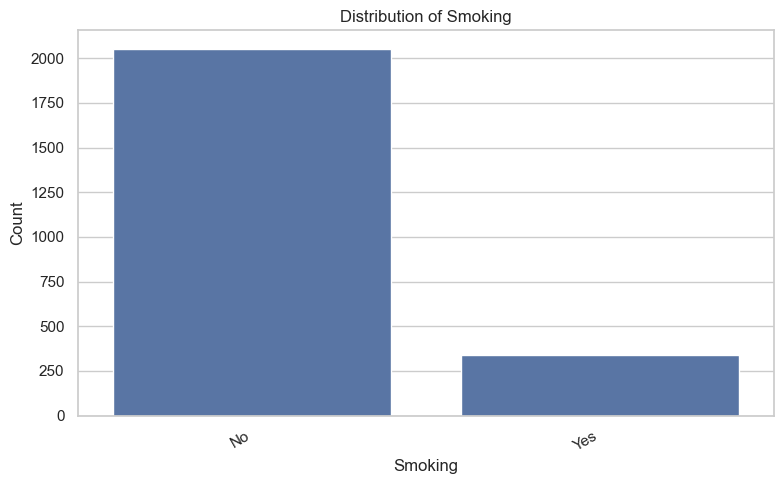

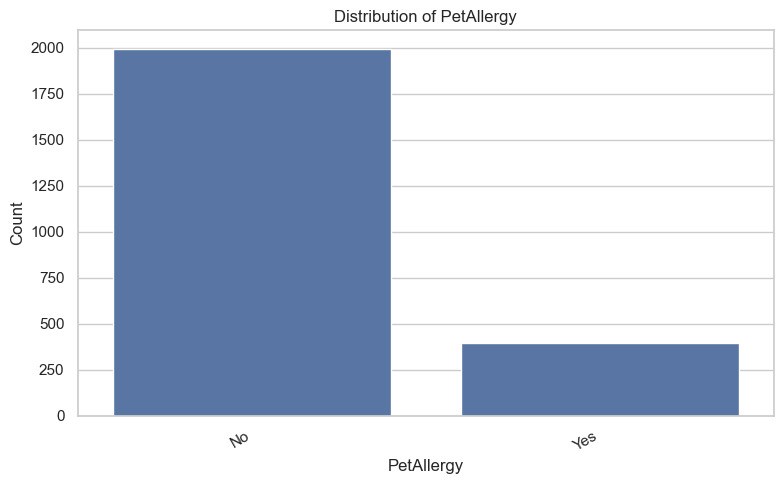

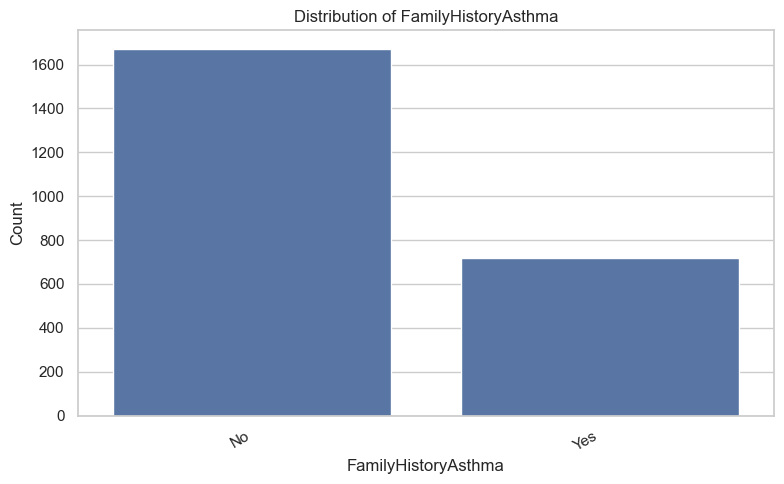

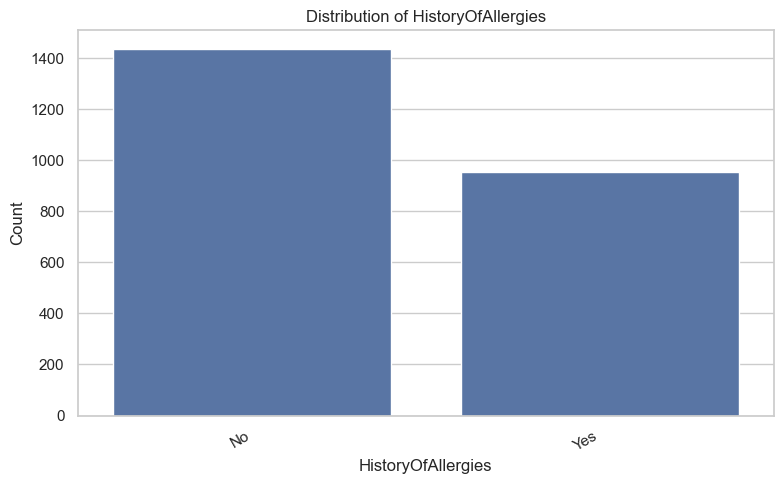

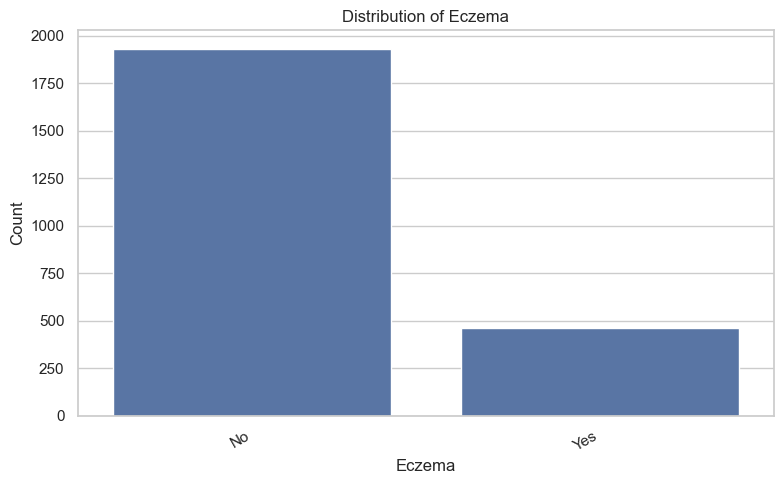

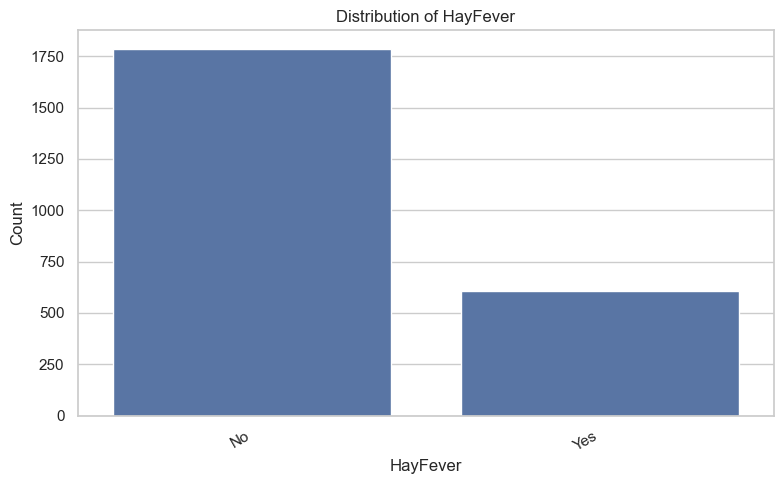

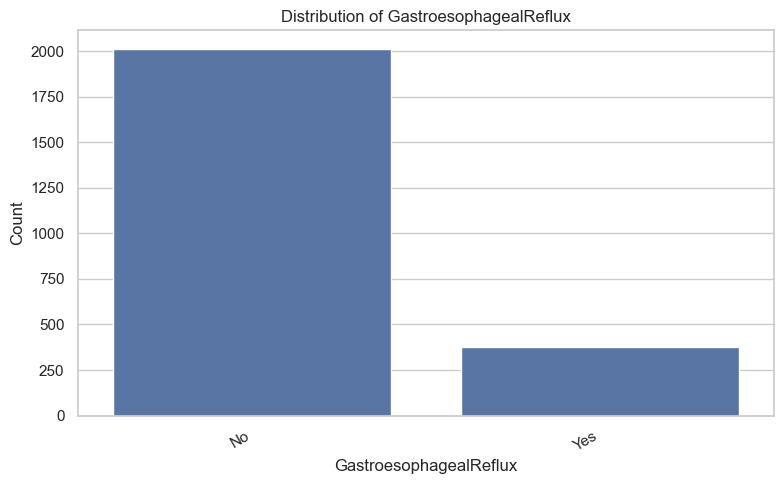

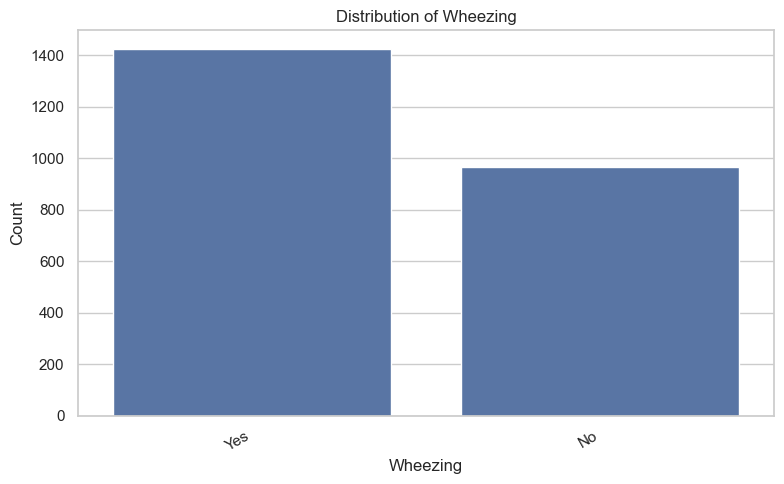

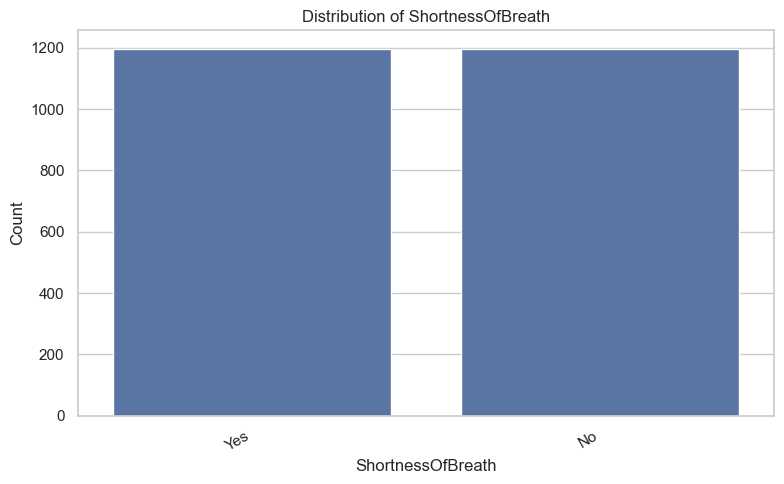

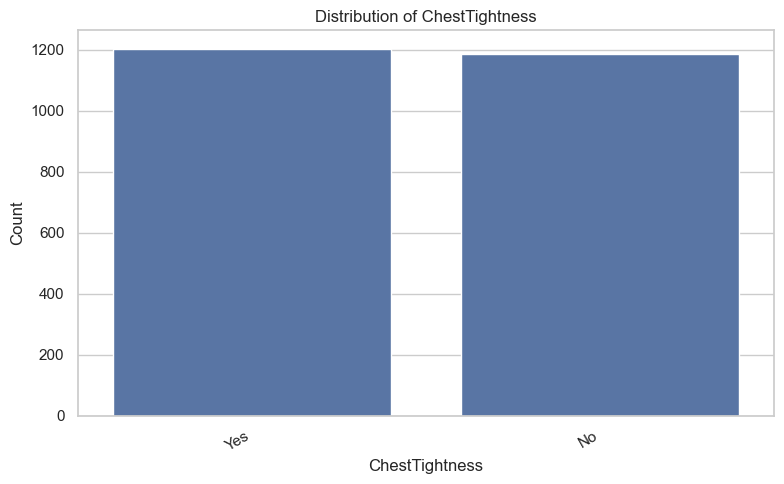

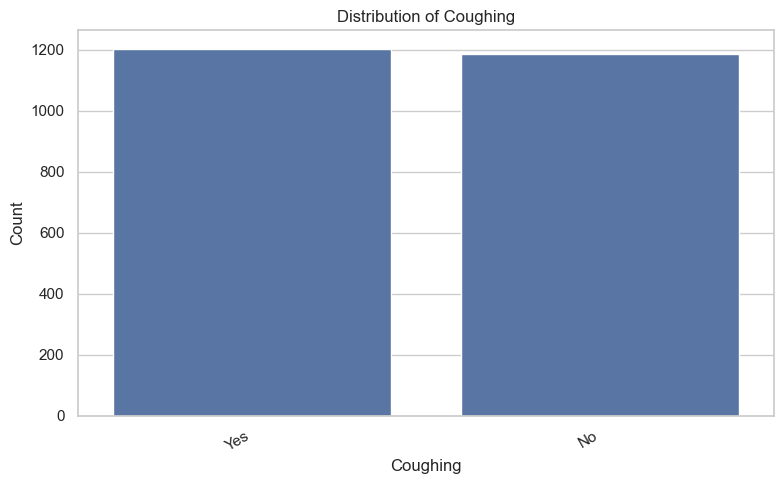

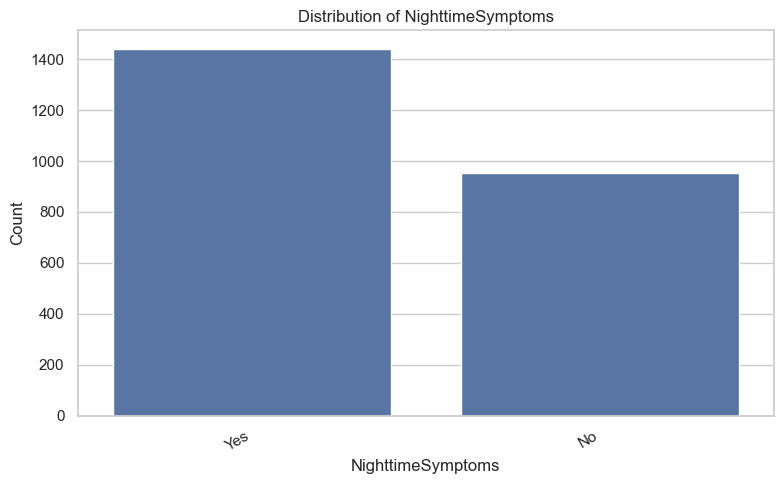

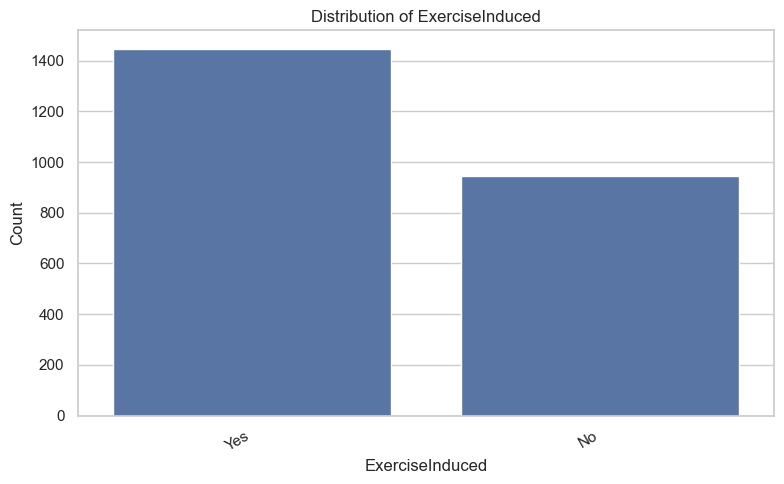

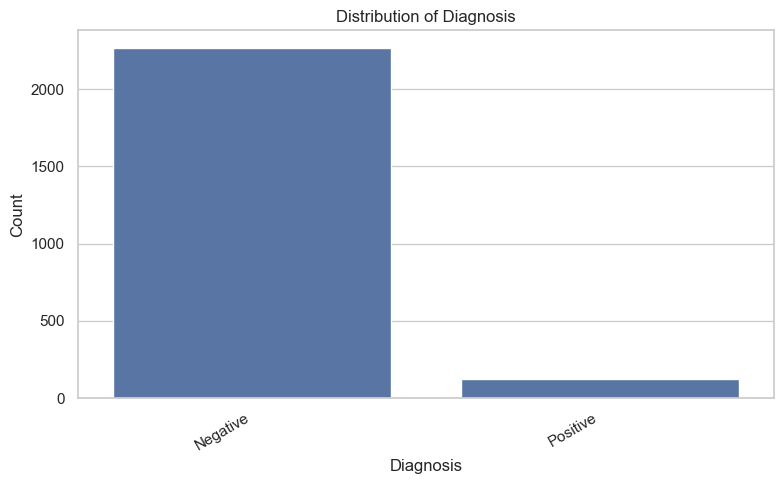

In [20]:

# --- 1) Define which features are continuous vs categorical ---
continuous_cols = [
    "Age", "BMI", "PhysicalActivity", "DietQuality",
    "SleepQuality", "PollutionExposure", "PollenExposure",
    "DustExposure", "LungFunctionFEV1", "LungFunctionFVC"
]

categorical_cols = [
    "Gender", "Ethnicity", "EducationLevel", "Smoking",
    "PetAllergy", "FamilyHistoryAsthma", "HistoryOfAllergies",
    "Eczema", "HayFever", "GastroesophagealReflux",
    "Wheezing", "ShortnessOfBreath", "ChestTightness",
    "Coughing", "NighttimeSymptoms", "ExerciseInduced",
    "Diagnosis"
]

# --- 2) Apply label mapping for categorical columns ---
for col in categorical_cols:
    if col in asthma_df.columns:
        asthma_df[f"{col}_label"] = apply_label_map(asthma_df[col], LABEL_MAPS.get(col, {}))

# --- 3) Plot continuous variables (histograms) ---
for col in continuous_cols:
    if col in asthma_df.columns:
        sns.histplot(asthma_df[col], bins=20, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

# --- 4) Plot categorical variables (countplots with labels) ---
for col in categorical_cols:
    label_col = f"{col}_label" if f"{col}_label" in asthma_df.columns else col
    sns.countplot(x=label_col, data=asthma_df, order=asthma_df[label_col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


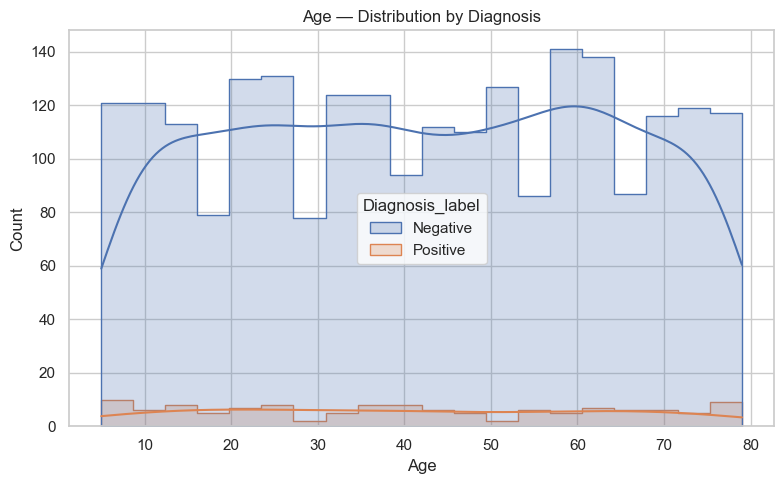

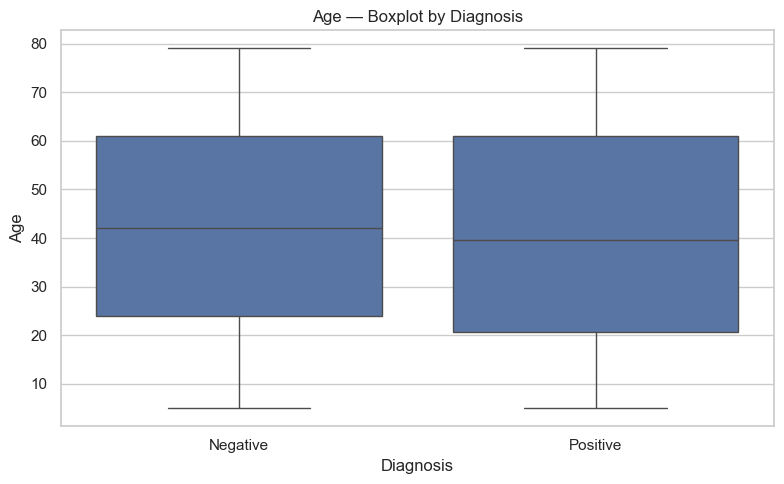

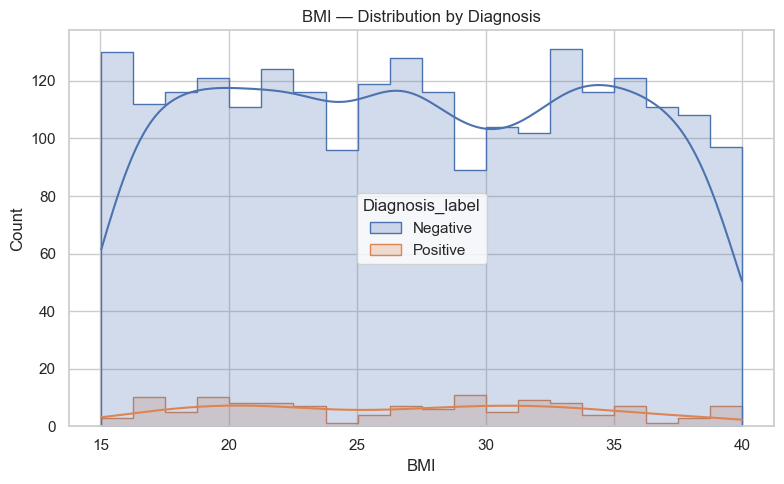

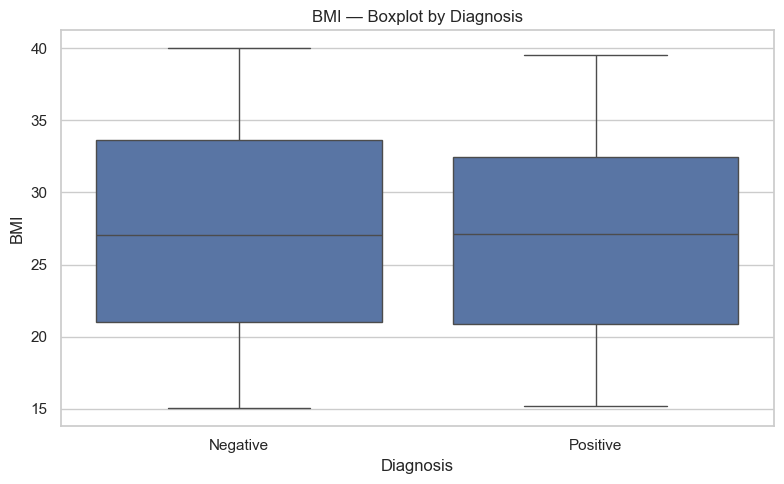

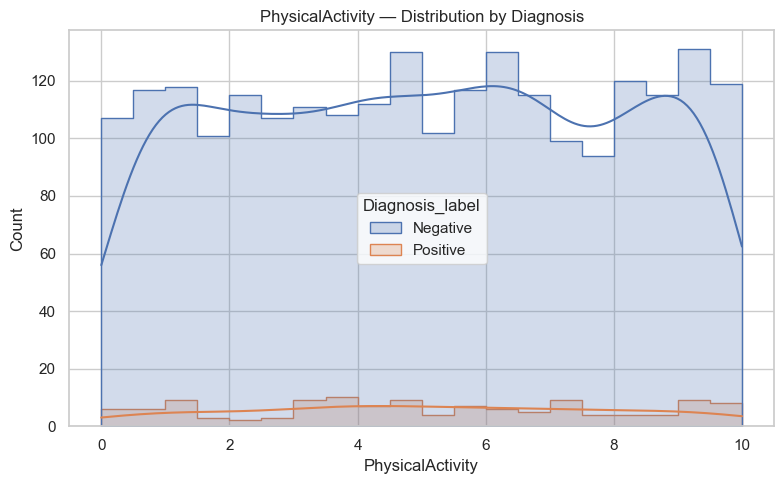

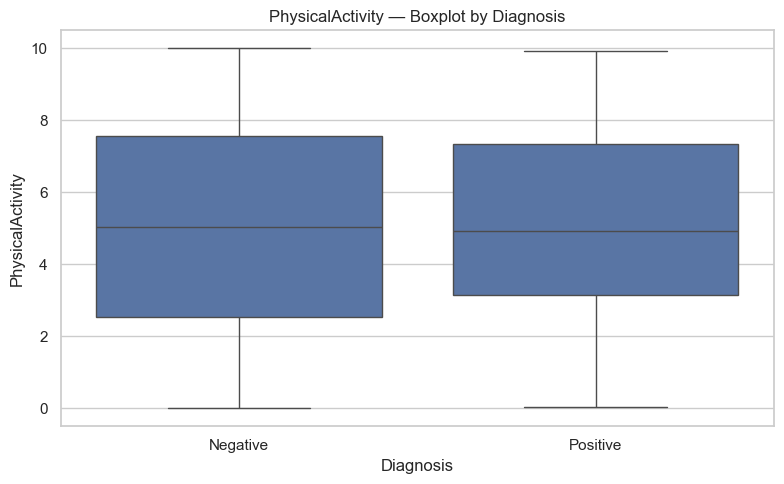

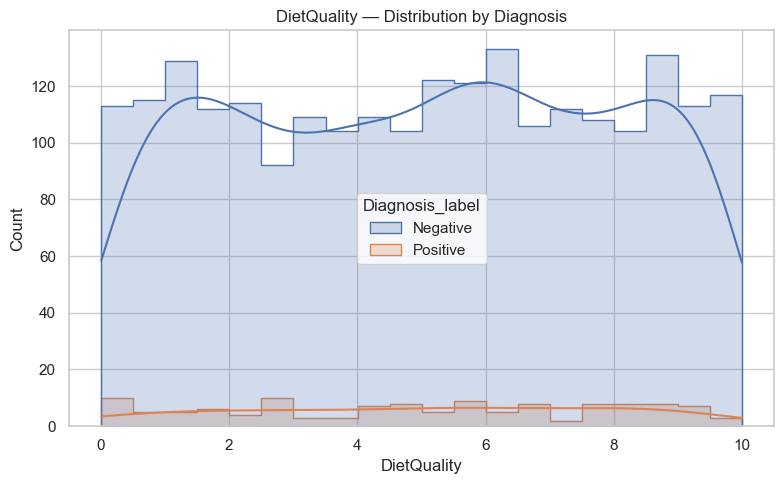

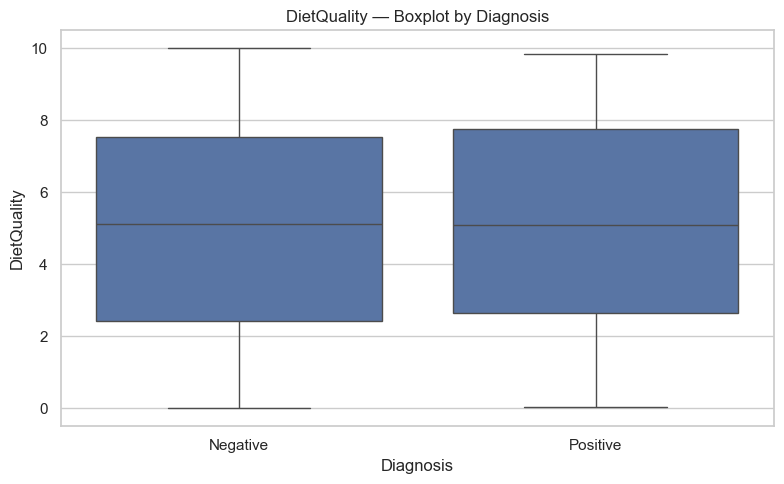

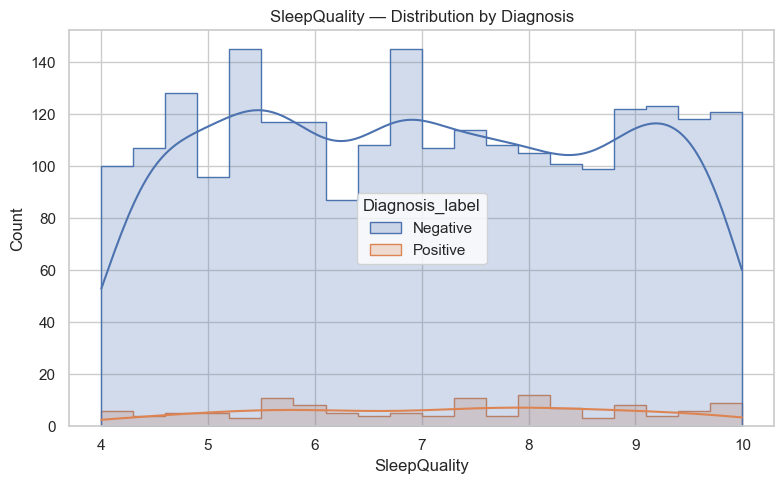

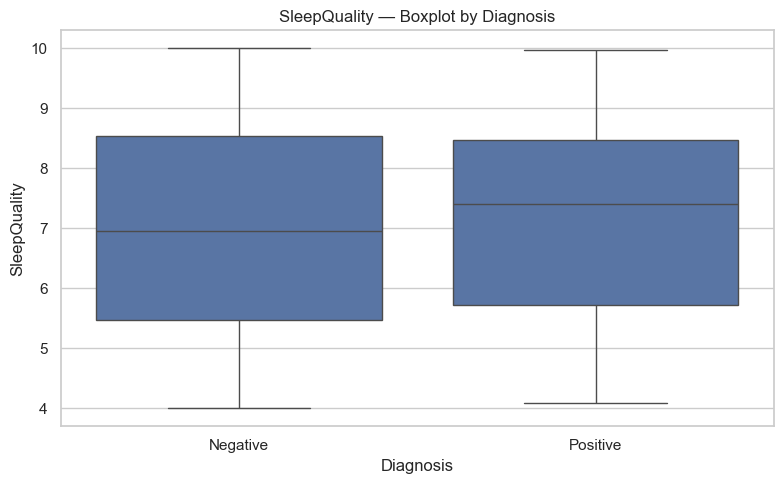

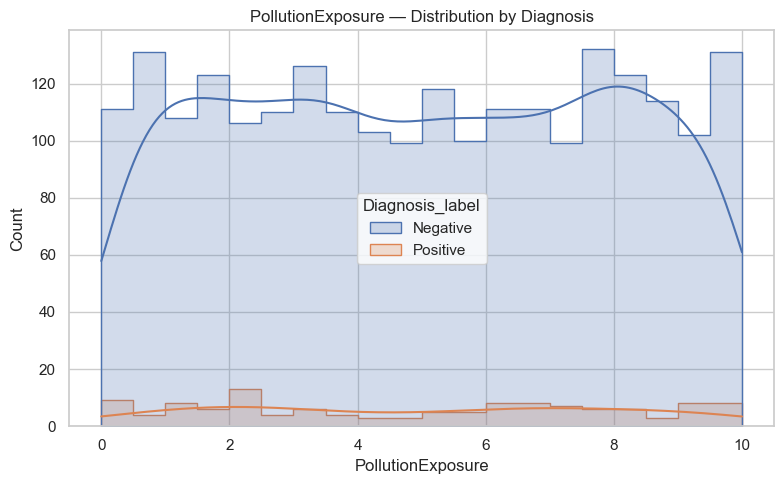

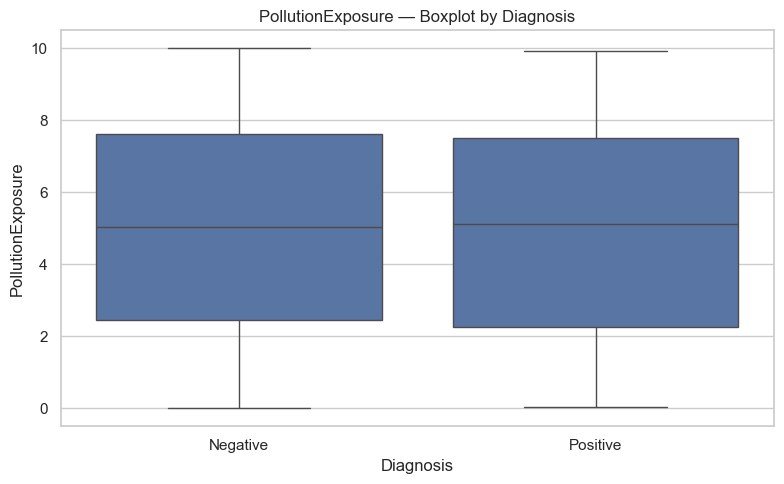

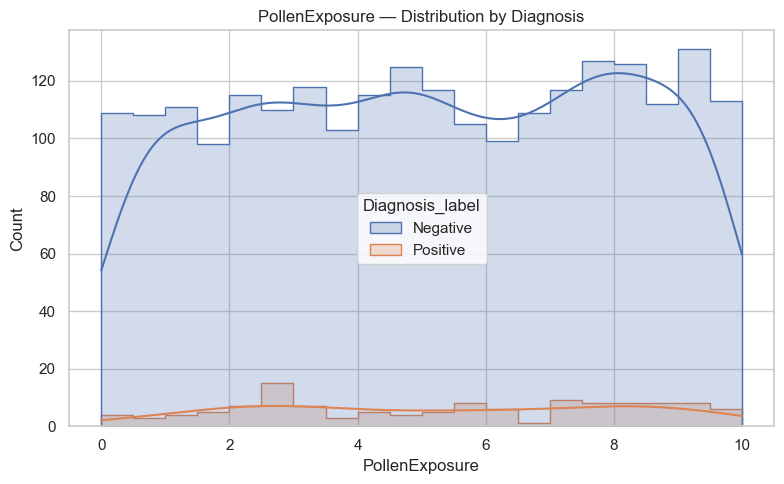

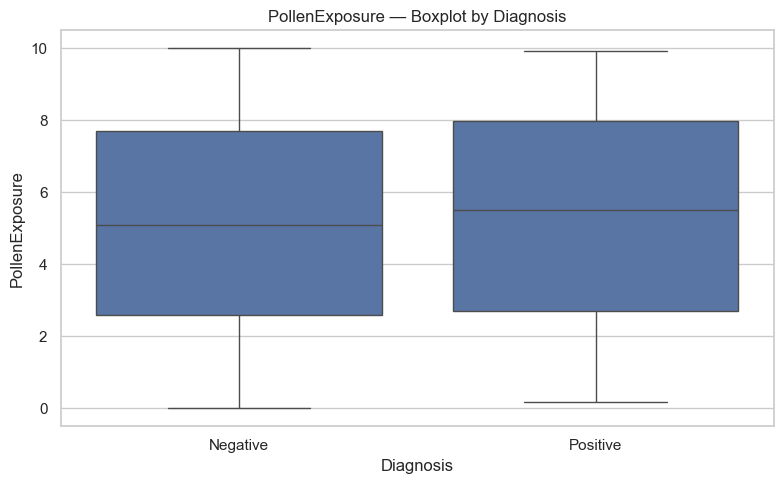

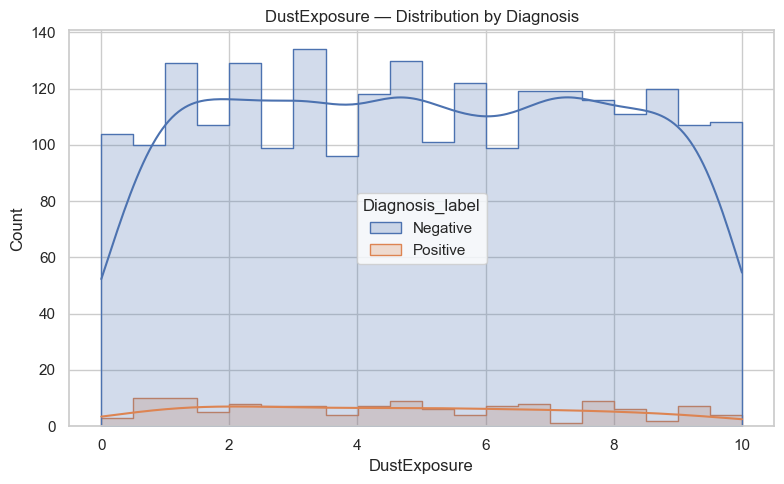

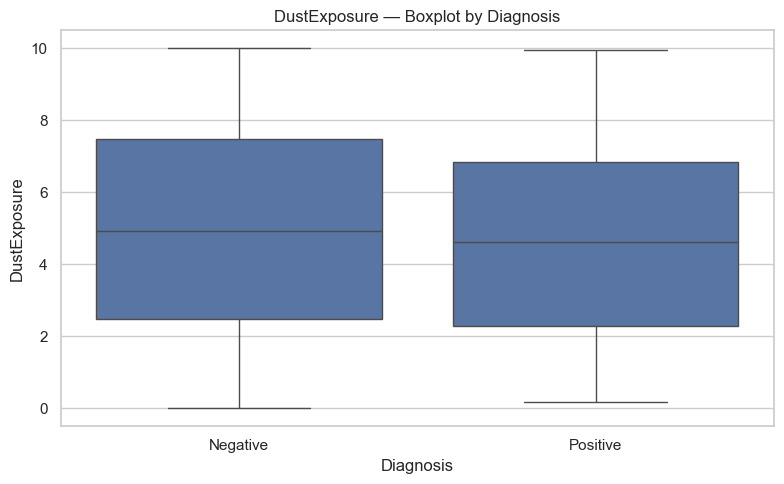

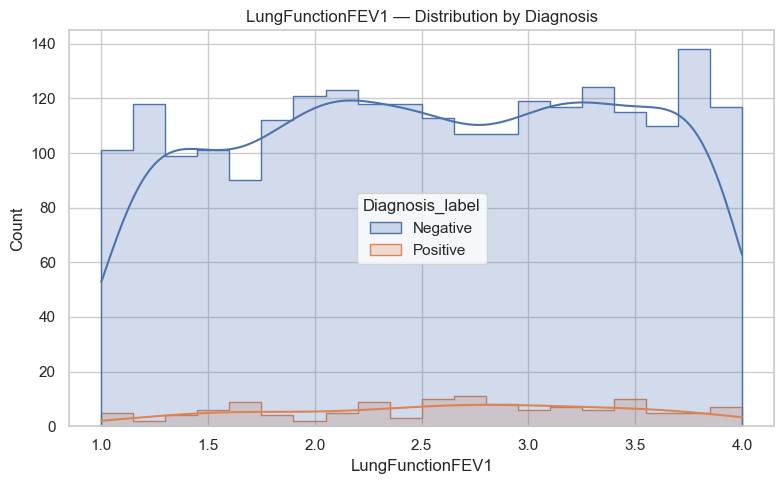

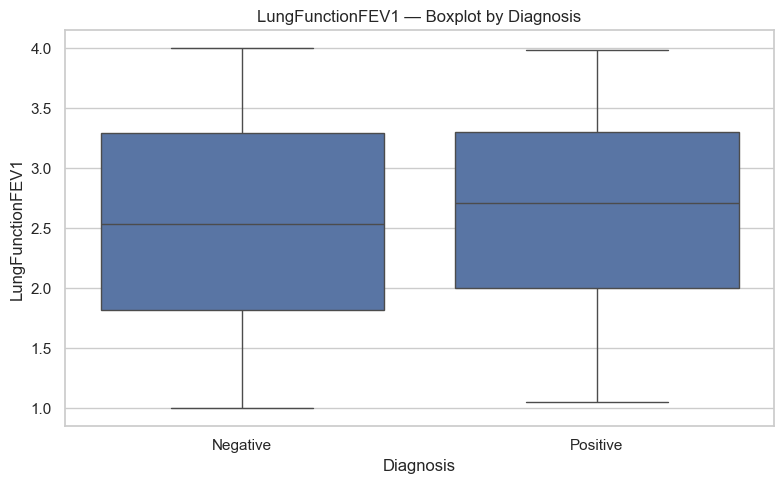

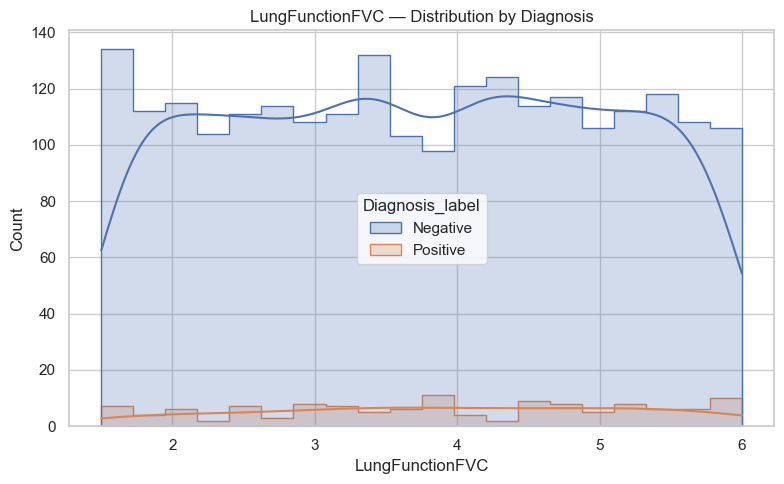

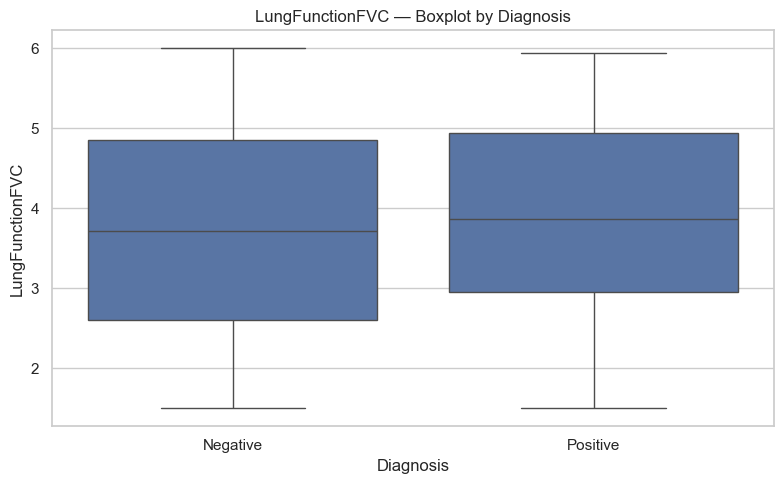

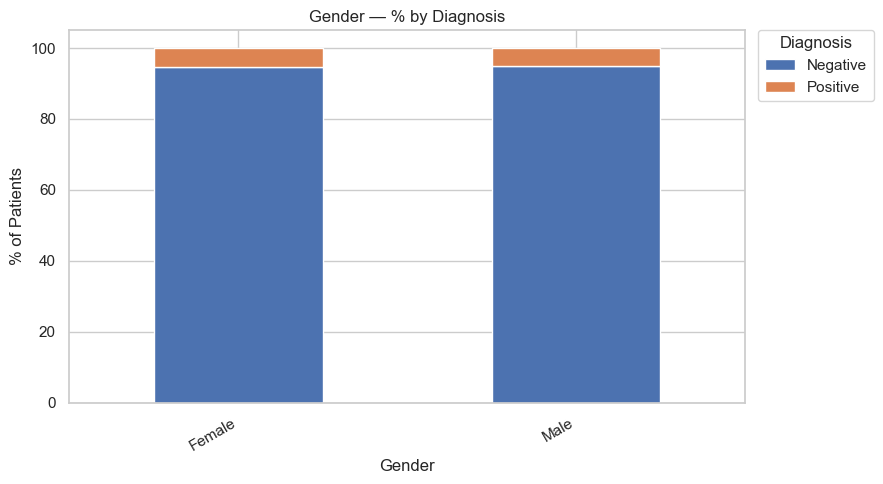

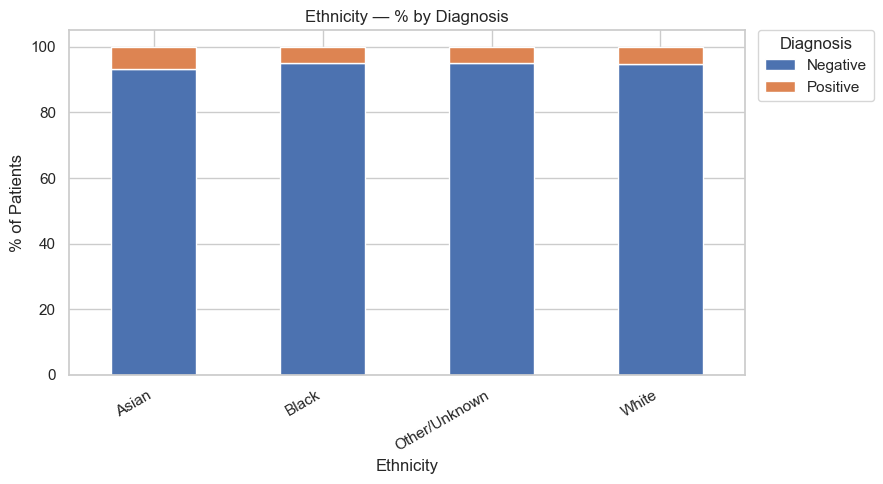

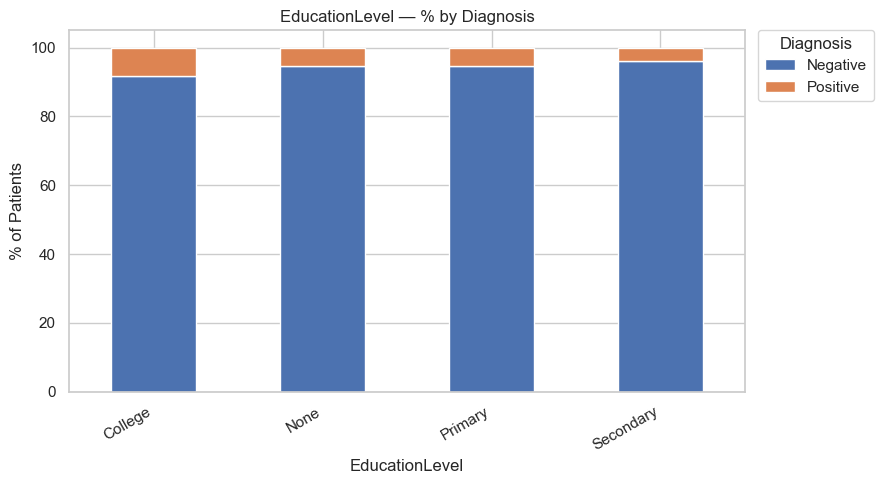

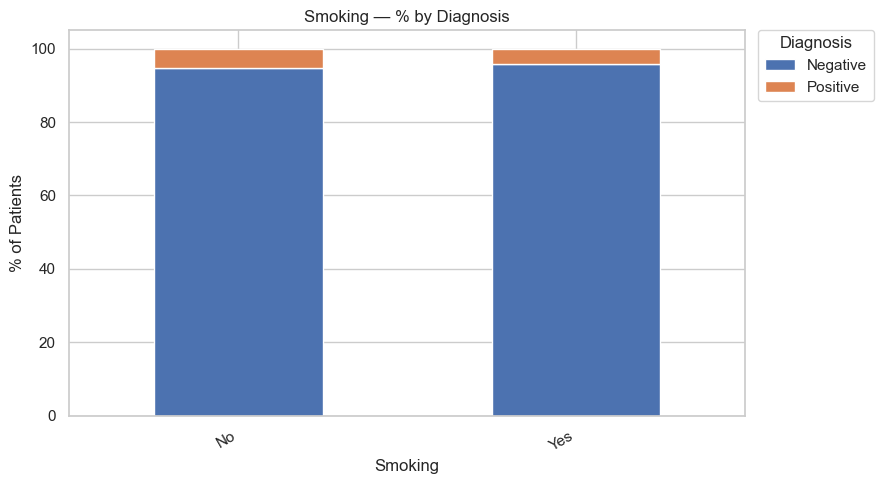

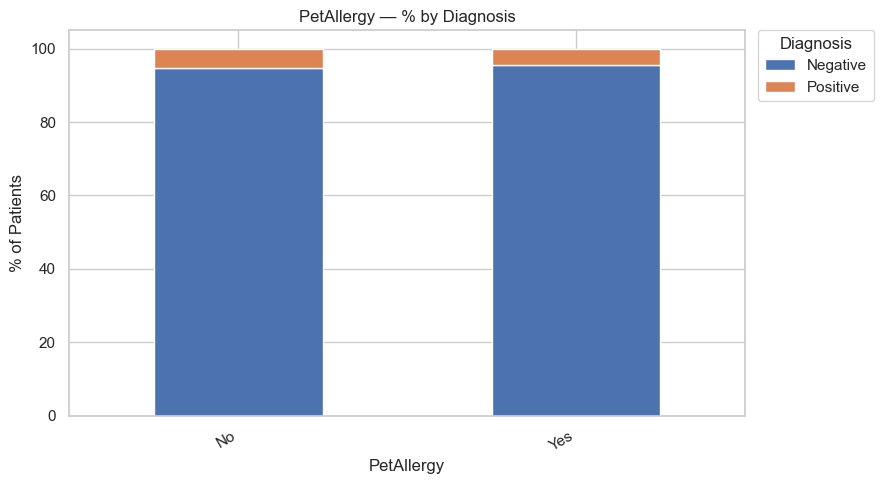

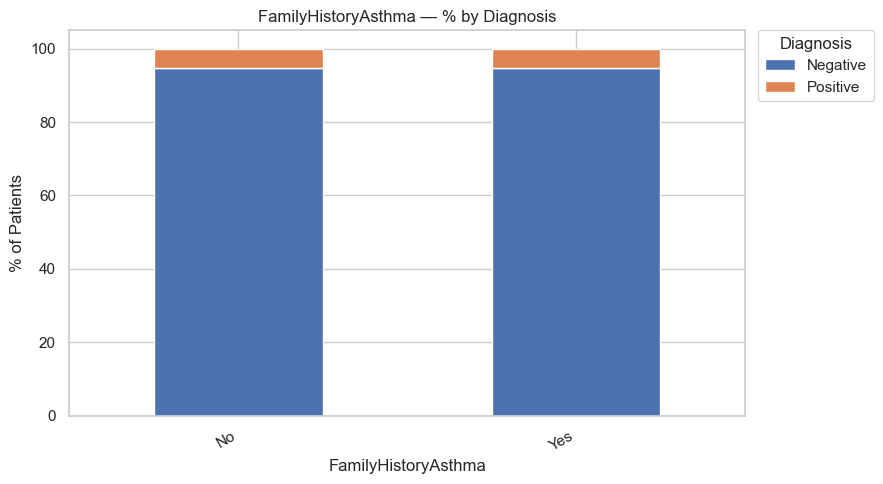

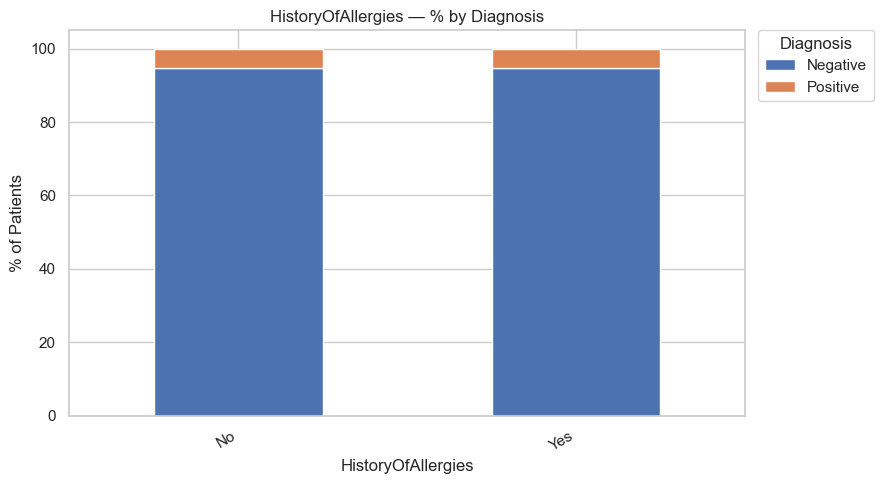

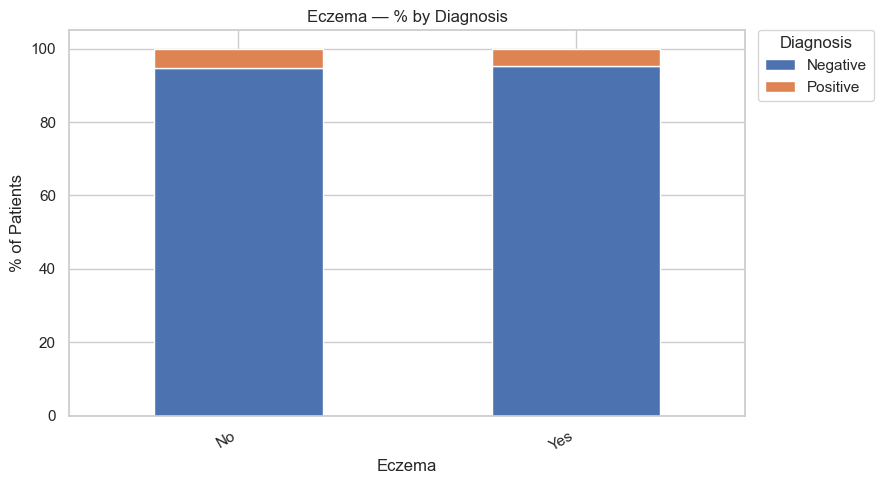

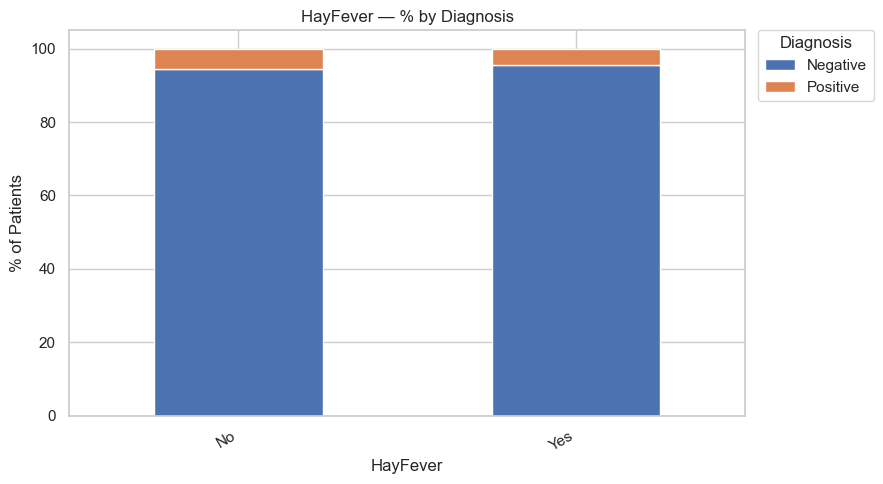

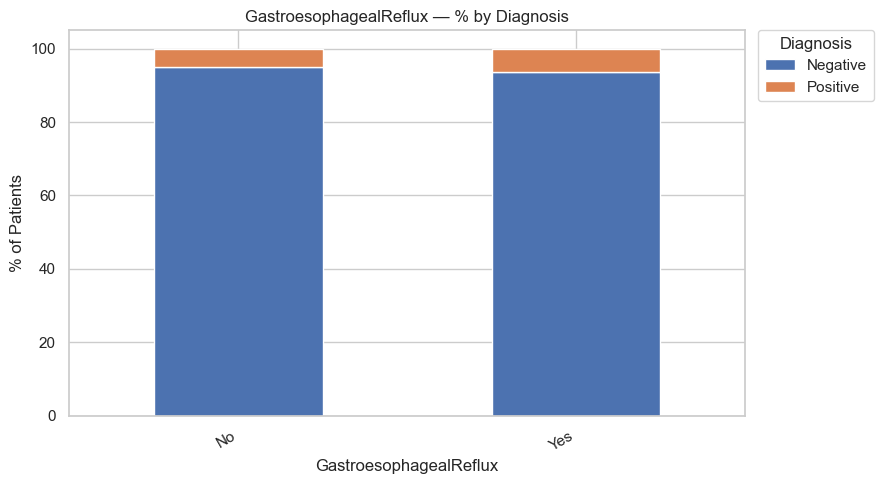

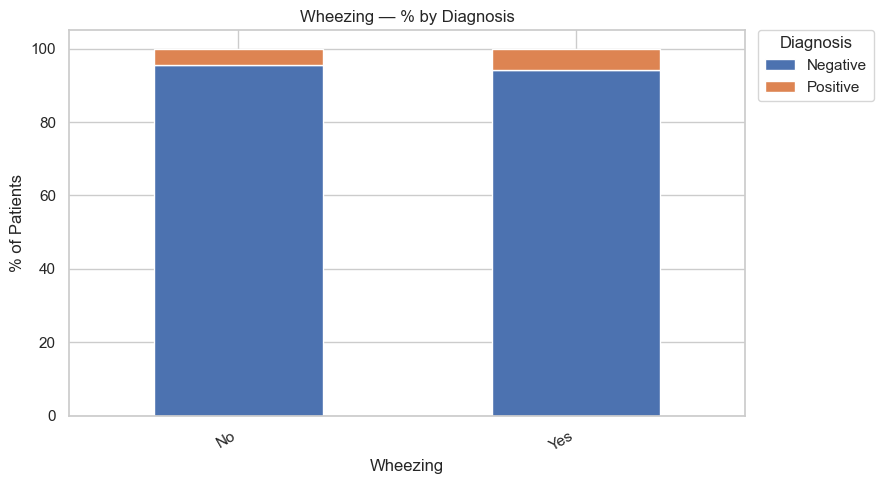

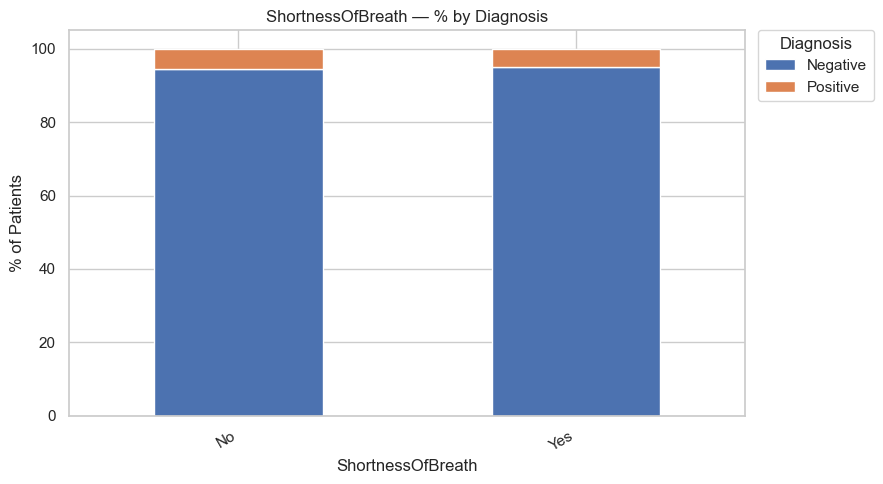

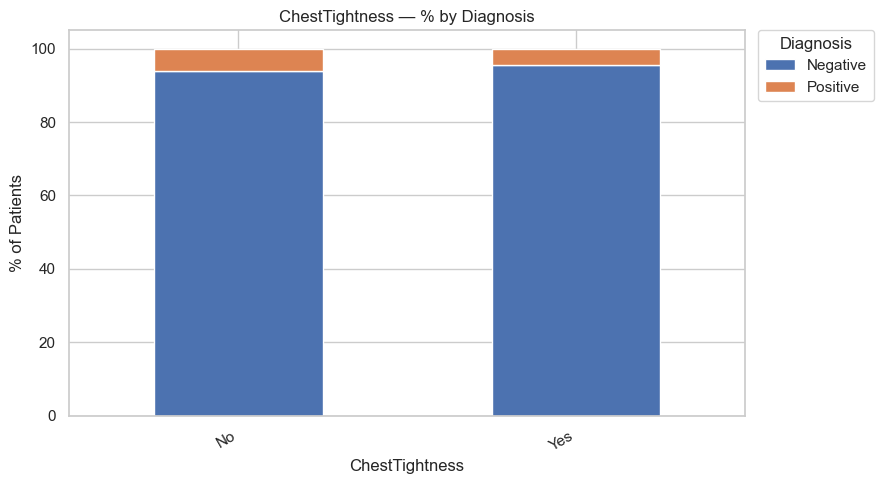

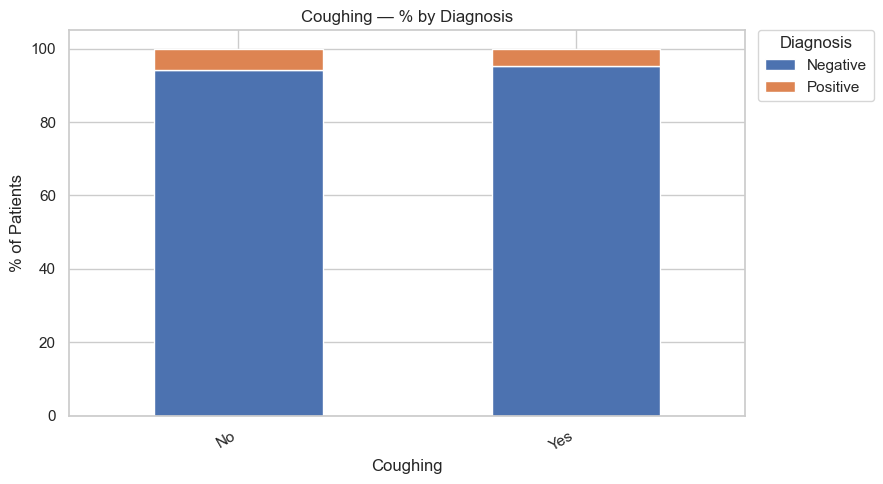

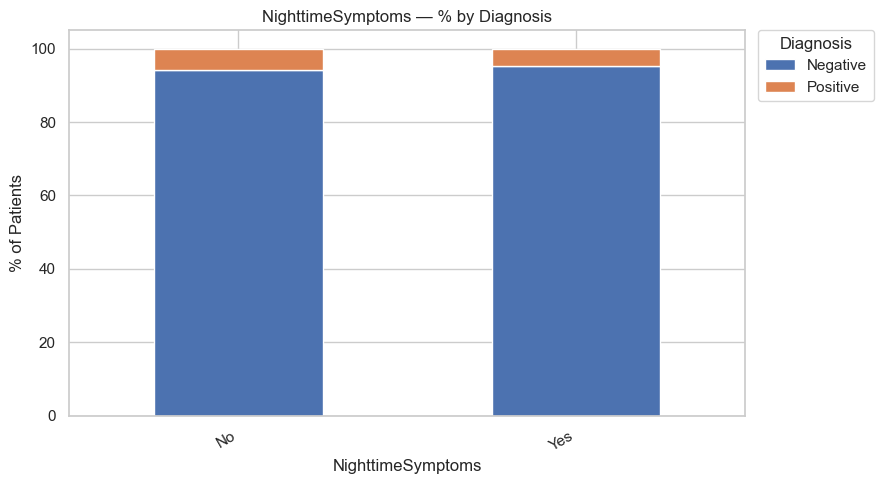

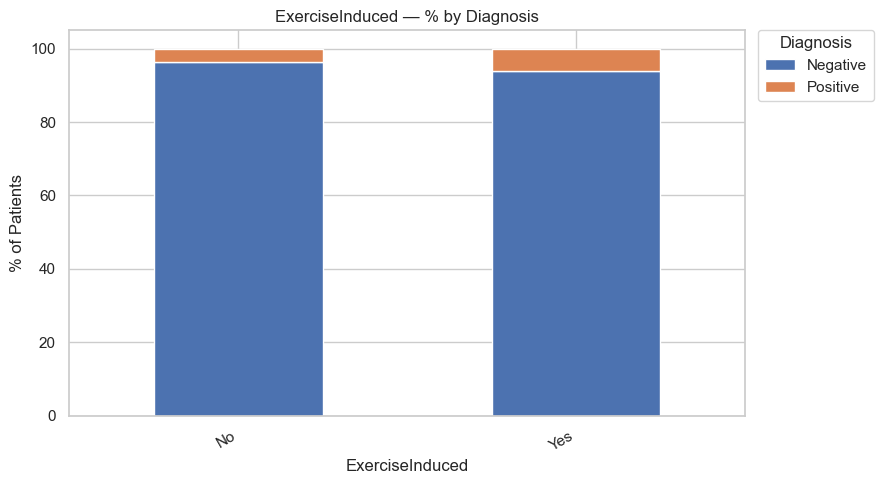

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# --- Ensure Diagnosis label exists ---
if "Diagnosis_label" not in asthma_df.columns and "Diagnosis" in asthma_df.columns:
    asthma_df["Diagnosis_label"] = apply_label_map(asthma_df["Diagnosis"], LABEL_MAPS.get("Diagnosis", {}))

# === A) CONTINUOUS VARIABLES SPLIT BY DIAGNOSIS ===
continuous_cols = [
    "Age", "BMI", "PhysicalActivity", "DietQuality",
    "SleepQuality", "PollutionExposure", "PollenExposure",
    "DustExposure", "LungFunctionFEV1", "LungFunctionFVC"
]
continuous_cols = [c for c in continuous_cols if c in asthma_df.columns]

# Helper: common bins per column (so Positive/Negative are comparable)
def common_bins(series, bins=20):
    # Use robust binning that respects min/max and ignores NaNs
    s = series.dropna().astype(float)
    if s.empty:
        return bins
    return np.histogram_bin_edges(s, bins=bins)

for col in continuous_cols:
    # 1) Overlaid histograms by Diagnosis
    bins = common_bins(asthma_df[col], bins=20)
    ax = sns.histplot(
        data=asthma_df, x=col, hue="Diagnosis_label",
        bins=bins, kde=True, element="step", stat="count", common_norm=False
    )
    ax.set_title(f"{col} — Distribution by Diagnosis")
    ax.set_xlabel(col); ax.set_ylabel("Count")
    plt.tight_layout(); plt.show()

    # 2) Boxplot by Diagnosis
    ax = sns.boxplot(data=asthma_df, x="Diagnosis_label", y=col)
    ax.set_title(f"{col} — Boxplot by Diagnosis")
    ax.set_xlabel("Diagnosis"); ax.set_ylabel(col)
    plt.tight_layout(); plt.show()

    # (Optional) Violin + inner quartiles (uncomment if you prefer)
    # ax = sns.violinplot(data=asthma_df, x="Diagnosis_label", y=col, inner="quartile", cut=0)
    # ax.set_title(f"{col} — Violin by Diagnosis")
    # ax.set_xlabel("Diagnosis"); ax.set_ylabel(col)
    # plt.tight_layout(); plt.show()


# === B) CATEGORICAL/BINARY VARIABLES vs DIAGNOSIS ===
categorical_cols = [
    "Gender", "Ethnicity", "EducationLevel", "Smoking",
    "PetAllergy", "FamilyHistoryAsthma", "HistoryOfAllergies",
    "Eczema", "HayFever", "GastroesophagealReflux",
    "Wheezing", "ShortnessOfBreath", "ChestTightness",
    "Coughing", "NighttimeSymptoms", "ExerciseInduced"
]
categorical_cols = [c for c in categorical_cols if c in asthma_df.columns]

# Ensure label-mapped columns exist
for col in categorical_cols:
    lbl = f"{col}_label"
    if lbl not in asthma_df.columns:
        asthma_df[lbl] = apply_label_map(asthma_df[col], LABEL_MAPS.get(col, {}))

# Helper: stacked percentage bar chart (category on X, % by diagnosis)
def stacked_pct_bar(df, cat_label_col, diagnosis_col="Diagnosis_label", rotate_xticks=True):
    # Crosstab to percentages by category
    ct = pd.crosstab(df[cat_label_col], df[diagnosis_col], normalize="index").fillna(0) * 100
    # Keep a stable diagnosis order if present
    order = ["Negative", "Positive"]
    cols_in_ct = [c for c in order if c in ct.columns] + [c for c in ct.columns if c not in order]
    ct = ct[cols_in_ct]

    ax = ct.plot(kind="bar", stacked=True, figsize=(9, 5))
    ax.set_title(f"{cat_label_col.replace('_label','')} — % by Diagnosis")
    ax.set_xlabel(cat_label_col.replace("_label", ""))
    ax.set_ylabel("% of Patients")
    if rotate_xticks:
        plt.xticks(rotation=30, ha="right")
    plt.legend(title="Diagnosis", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
    plt.tight_layout()
    plt.show()

# Plot stacked % bars for each categorical vs Diagnosis
for col in categorical_cols:
    stacked_pct_bar(asthma_df, f"{col}_label", diagnosis_col="Diagnosis_label")